<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_0_8_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_0.8'

In [17]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n250.csv')

In [18]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,82.917356,34.068388,67.900907,10.115171,205.001823,194.292742,10.709081
1,0.0,1.0,64.043434,67.089070,38.899903,16.621477,196.653883,178.668879,17.985004
2,0.0,2.0,30.698935,58.881232,50.122107,-41.916992,107.785282,148.202763,-40.417481
3,0.0,3.0,39.954980,89.876534,20.144878,-12.593754,147.382638,157.985461,-10.602823
4,0.0,4.0,20.703151,50.034116,96.374000,-7.623760,169.487507,175.244639,-5.757132
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,83.218754,37.306294,60.268222,-35.399561,155.393709,191.851089,-36.457380
249996,999.0,246.0,63.201257,86.482982,93.381612,-38.350550,214.715300,255.163398,-40.448097
249997,999.0,247.0,73.442053,31.547563,57.163211,16.213610,188.366436,172.085246,16.281190
249998,999.0,248.0,70.824147,50.265501,22.425191,3.544334,157.059172,154.878982,2.180190


In [19]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y       y_hat      e_hat
rep   index                                                                               
0.0   0.0    82.917356  34.068388  67.900907  10.115171  205.001823  194.292742  10.709081
      1.0    64.043434  67.089070  38.899903  16.621477  196.653883  178.668879  17.985004
      2.0    30.698935  58.881232  50.122107 -41.916992  107.785282  148.202763 -40.417481
      3.0    39.954980  89.876534  20.144878 -12.593754  147.382638  157.985461 -10.602823
      4.0    20.703151  50.034116  96.374000  -7.623760  169.487507  175.244639  -5.757132
...                ...        ...        ...        ...         ...         ...        ...
999.0 245.0  83.218754  37.306294  60.268222 -35.399561  155.393709  191.851089 -36.457380
      246.0  63.201257  86.482982  93.381612 -38.350550  214.715300  255.163398 -40.448097
      247.0  73.442053  31.547563  57.163211  16.213610  188.366436  172.085246  16.281190
      248.0  70.824147  50.265501  22.425191   3.544334  157.059172  154.878982   2.180190
      249.0  71.077429  38.798128  81.072405  26.293100  227.241062  200.830146  26.410916

[250000 rows x 7 columns]

In [20]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y       y_hat      e_hat
rep   index                                                                               
0.0   0.0    82.917356  34.068388  67.900907  10.115171  205.001823  194.292742  10.709081
      1.0    64.043434  67.089070  38.899903  16.621477  196.653883  178.668879  17.985004
      2.0    30.698935  58.881232  50.122107 -41.916992  107.785282  148.202763 -40.417481
      3.0    39.954980  89.876534  20.144878 -12.593754  147.382638  157.985461 -10.602823
      4.0    20.703151  50.034116  96.374000  -7.623760  169.487507  175.244639  -5.757132
...                ...        ...        ...        ...         ...         ...        ...
999.0 245.0  83.218754  37.306294  60.268222 -35.399561  155.393709  191.851089 -36.457380
      246.0  63.201257  86.482982  93.381612 -38.350550  214.715300  255.163398 -40.448097
      247.0  73.442053  31.547563  57.163211  16.213610  188.366436  172.085246  16.281190
      248.0  70.824147  50.265501  22.425191   3.544334  157.059172  154.878982   2.180190
      249.0  71.077429  38.798128  81.072405  26.293100  227.241062  200.830146  26.410916

[250000 rows x 7 columns]

In [21]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,82.917356,34.068388,67.900907,10.115171,205.001823,194.292742,10.709081
1,0.0,1.0,64.043434,67.089070,38.899903,16.621477,196.653883,178.668879,17.985004
2,0.0,2.0,30.698935,58.881232,50.122107,-41.916992,107.785282,148.202763,-40.417481
3,0.0,3.0,39.954980,89.876534,20.144878,-12.593754,147.382638,157.985461,-10.602823
4,0.0,4.0,20.703151,50.034116,96.374000,-7.623760,169.487507,175.244639,-5.757132
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,83.218754,37.306294,60.268222,-35.399561,155.393709,191.851089,-36.457380
249996,999.0,246.0,63.201257,86.482982,93.381612,-38.350550,214.715300,255.163398,-40.448097
249997,999.0,247.0,73.442053,31.547563,57.163211,16.213610,188.366436,172.085246,16.281190
249998,999.0,248.0,70.824147,50.265501,22.425191,3.544334,157.059172,154.878982,2.180190


In [22]:
table.set_index(['rep', 'index'], inplace=True)

In [23]:
table

x1         x2         x3          e           Y       y_hat      e_hat
rep   index                                                                               
0.0   0.0    82.917356  34.068388  67.900907  10.115171  205.001823  194.292742  10.709081
      1.0    64.043434  67.089070  38.899903  16.621477  196.653883  178.668879  17.985004
      2.0    30.698935  58.881232  50.122107 -41.916992  107.785282  148.202763 -40.417481
      3.0    39.954980  89.876534  20.144878 -12.593754  147.382638  157.985461 -10.602823
      4.0    20.703151  50.034116  96.374000  -7.623760  169.487507  175.244639  -5.757132
...                ...        ...        ...        ...         ...         ...        ...
999.0 245.0  83.218754  37.306294  60.268222 -35.399561  155.393709  191.851089 -36.457380
      246.0  63.201257  86.482982  93.381612 -38.350550  214.715300  255.163398 -40.448097
      247.0  73.442053  31.547563  57.163211  16.213610  188.366436  172.085246  16.281190
      248.0  70.824147  50.265501  22.425191   3.544334  157.059172  154.878982   2.180190
      249.0  71.077429  38.798128  81.072405  26.293100  227.241062  200.830146  26.410916

[250000 rows x 7 columns]

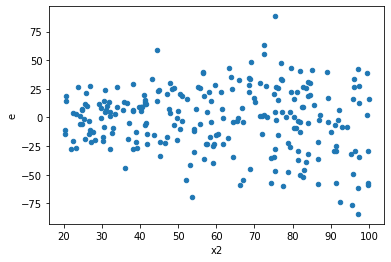

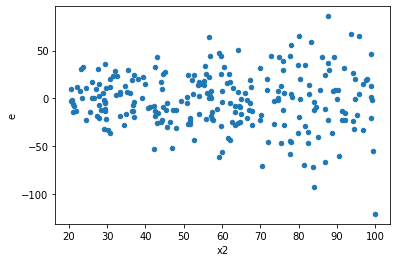

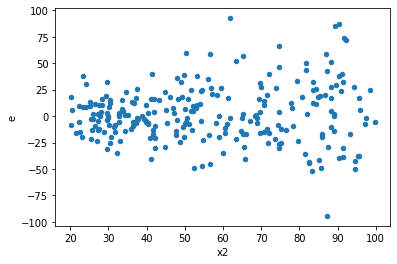

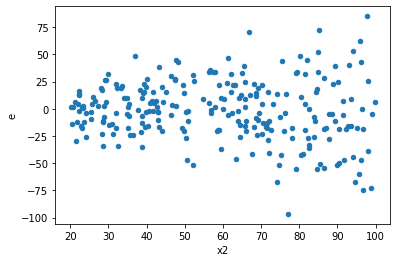

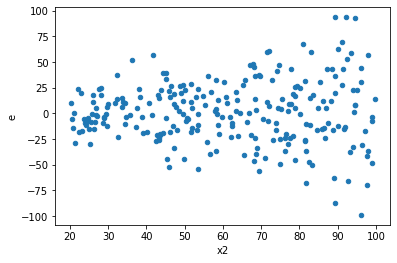

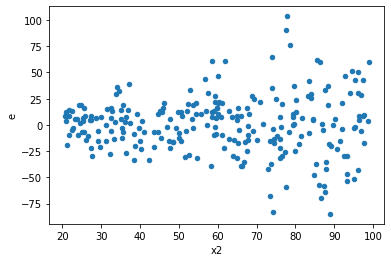

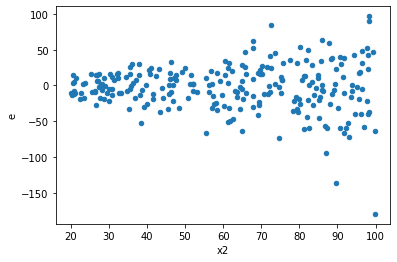

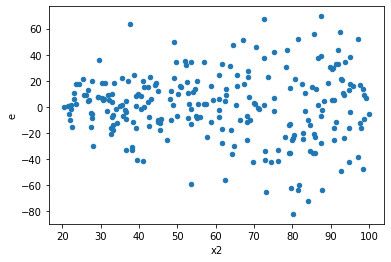

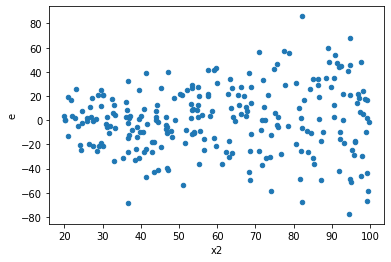

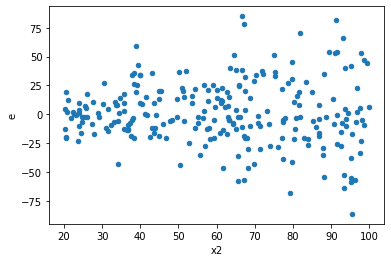

In [24]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [25]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [26]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
2.0,110.0,134.0,36529.418391649255,124915.8570143935,335.13227882247025,939.2169700330339,2.8071311346644476,5.0186639288796187e-08,0.9999999749066804,Reject005=0 : Heteroscedasticity
3.0,130.0,114.0,87119.36004348779,94678.99214525192,675.3438763061068,837.8671871261232,1.2393028563420458,0.23581147762527888,0.8820942611873606,Reject005=1 : Homoscedasticity
4.0,114.0,130.0,56384.26315291116,74430.78298153119,498.97578011425804,576.9828138103193,1.157593760744006,0.4241713331884267,0.7879143334057866,Reject005=1 : Homoscedasticity
5.0,108.0,136.0,43498.19516582523,178443.31610414237,406.52518846565636,1321.8023415121656,3.2577210566503525,7.373410770838973e-10,0.9999999996313295,Reject005=0 : Heteroscedasticity
12.0,112.0,132.0,74268.48370475015,93814.60821750955,669.0854387815328,716.142047461905,1.0717907471430959,0.7073240399992162,0.6463379800003919,Reject005=1 : Homoscedasticity
16.0,111.0,133.0,39062.558942723335,224796.04410720503,355.1141722065758,1703.0003341454926,4.8028531959334275,8.881784197001252e-16,0.9999999999999996,Reject005=0 : Heteroscedasticity
17.0,125.0,119.0,66748.60929660231,99606.48427500413,538.2952362629219,844.1227480932553,1.5675032192477651,0.013427441400911233,0.9932862792995444,Reject005=0 : Heteroscedasticity
18.0,142.0,102.0,58960.09957093472,119731.69589500847,418.1567345456363,1185.4623355941433,2.827086510052557,1.2302207474945703e-08,0.9999999938488963,Reject005=0 : Heteroscedasticity
19.0,131.0,113.0,85915.46348270081,91389.04414583599,660.8881806361601,815.9736084449642,1.23314926913311,0.24675683752956123,0.8766215812352194,Reject005=1 : Homoscedasticity


In [27]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,121.0,123.0,93209.85845388207,70190.01900468468,776.7488204490172,575.328024628563,0.7407877131024814,0.09860127111380329,Reject005=1 : Homoscedasticity
1.0,123.0,121.0,103725.18637346494,94507.35356207118,850.2064456841389,787.5612796839265,0.9261922001636687,0.6730461352663039,Reject005=1 : Homoscedasticity
2.0,110.0,134.0,36529.418391649255,124915.8570143935,335.13227882247025,939.2169700330339,2.8071311346644476,5.0186639288796187e-08,Reject005=0 : Heteroscedasticity
3.0,130.0,114.0,87119.36004348779,94678.99214525192,675.3438763061068,837.8671871261232,1.2393028563420458,0.23581147762527888,Reject005=1 : Homoscedasticity
4.0,114.0,130.0,56384.26315291116,74430.78298153119,498.97578011425804,576.9828138103193,1.157593760744006,0.4241713331884267,Reject005=1 : Homoscedasticity
5.0,108.0,136.0,43498.19516582523,178443.31610414237,406.52518846565636,1321.8023415121656,3.2577210566503525,7.373410770838973e-10,Reject005=0 : Heteroscedasticity
6.0,107.0,137.0,108030.02127571985,82243.55275702116,1019.1511441105646,604.7320055663321,0.5945941220635524,0.004164933128907568,Reject005=0 : Heteroscedasticity
7.0,131.0,113.0,114399.97054625493,41052.88066314708,879.9997734327302,366.5435773495275,0.4160165195470711,2.679993170665182e-06,Reject005=0 : Heteroscedasticity
8.0,112.0,132.0,100424.49897754668,89339.42658493706,904.7252160139341,681.9803556102065,0.7548272642773347,0.12034832648658826,Reject005=1 : Homoscedasticity


In [28]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      545
Reject005=0 : Heteroscedasticity    455
Name: Result_test, dtype: int64